# ❄️ Frozen Lake

**Frozen Lake** is a simple environment composed of tiles, where the AI
has to **move from an initial tile to a goal**.

Tiles can be a safe frozen lake ✅, or a hole ❌ that gets you stuck
forever.

The AI, or agent, has 4 possible actions: go **◀️ LEFT**, **🔽 DOWN**,
**▶️ RIGHT**, or **🔼 UP**.

The agent must learn to avoid holes in order to reach the goal in a
**minimal number of actions**.

# Required Libraries

In [1]:
import gymnasium as gym
import random
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

# Initialize the Environment

In [2]:
env = gym.make("FrozenLake-v1", is_slippery = False) #in non-slippery version actions cannot be ignored
env.reset()
env.render()

/Users/cjrobe/miniforge3/envs/website/lib/python3.11/site-packages/gymnasium/envs/toy_text/frozen_lake.py:328: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(

-   S: starting point, safe
-   F: frozen surface, safe
-   H: hole, stuck forever
-   G: goal, safe

In [3]:
Image(filename = "FrozenLake.gif", width=400)

<IPython.core.display.Image object>

In [4]:
Image(filename = "Final.gif", width=400)

<IPython.core.display.Image object>

# Reward

Reward schedule:

-   Reach goal(G): +1

-   Reach hole(H): 0

-   Reach frozen surface(F): 0

# Size of Action and State Space

In [5]:
print("State space: ", env.observation_space.n)
print("Action space: ", env.action_space.n)

State space:  16
Action space:  4

In Frozen Lake, there are **16 tiles**, which means our agent can be
found in 16 different positions, called states.

For each state, there are **4 possible actions**:

-   ◀️ LEFT: **0**
-   🔽 DOWN: **1**
-   ▶️ RIGHT: **2**
-   🔼 UP: **3**

# Initialize Q Table

In [6]:
Image(filename = "QTable.gif", width=400)

<IPython.core.display.Image object>

In [7]:
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)

nb_states = env.observation_space.n  # = 16
nb_actions = env.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

# Update Formula

### \$ Q\_{new}(s_t, a_t) = Q(s_t, a_t) + (r_t + max_a Q(s\_{t+1}, a) - Q(s_t, a_t)) \$

# Epsilon-Greedy Algorithm

In this method, we want to allow our agent to either:

-   Take the action with the highest value **(exploitation)**;
-   Choose a random action to try to find even better ones
    **(exploration)**.

In [8]:
Image(filename = "tradeoff.gif", width=700)

<IPython.core.display.Image object>

# Hyperparameters

In [9]:
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# Training

In [10]:
# List of outcomes to plot
outcomes = []

for _ in range(episodes):

    state,info = env.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
            action = env.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, _, info = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

# Updated Q Table

In [11]:
print('===========================================')
print('Q-table after training:')
print(qtable)

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.59047945 0.59045162]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80134387 0.9        0.72880834]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]

# Plot Outcomes

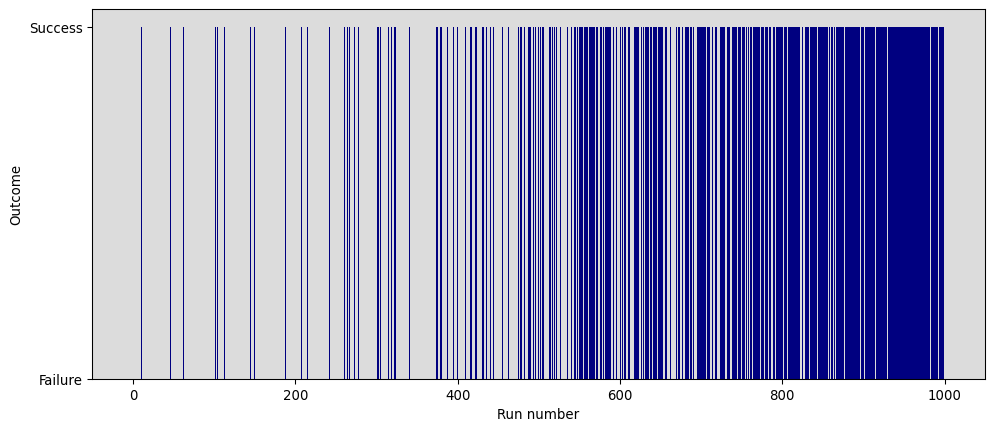

In [12]:
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('gainsboro')
plt.bar(range(len(outcomes)), outcomes, color="navy", width=1.0)
plt.show()

# Evaluation

In [13]:
episodes = 1
nb_success = 0


state,info = env.reset()
env.render()
done = False

# Until the agent gets stuck or reaches the goal, keep training it
while not done:

    # Choose the action with the highest value in the current state
    action = np.argmax(qtable[state])

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, _, info = env.step(action)

    # Render the environment
    print()
    env.render()

    # Update our current state
    state = new_state

    # When we get a reward, it means we solved the game
    nb_success += reward

# Let's check our success rate!
print()
print (f"Success rate = {nb_success/episodes*100}%")








Success rate = 100.0%